# Project - 2 Group 16 - Rohit Suseel, Madhumitha Vijayakrishna

<font size="5">Predicting Housing Prices in King County, USA using Regression Analysis</font>

Regression
Abstratct: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Source Link: https://www.kaggle.com/harlfoxem/housesalesprediction

MinMaxScaler is used for both the tasks because StandardScaler cannot guarantee balanced feature scales in the presence of outliers.


There are no missing values in the original datasets, values are manually removed.

In [4]:
import numpy as np #handling numbers
import pandas as pd #handling the dataset
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer # handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # encoding categorical data
from sklearn.model_selection import train_test_split # splitting training and testing data
from sklearn.preprocessing import StandardScaler #feature scaling
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:/UTD Fall 2020/AML/Project 1/Project1_Group16/kc_house_data.csv') 
df.rename(columns ={'price': 'SalePrice'}, inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   SalePrice      21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [22]:
df.describe()

,id,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [23]:
df.head()

,id,date,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
pd.isnull(df).any()

id               False
date             False
SalePrice        False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

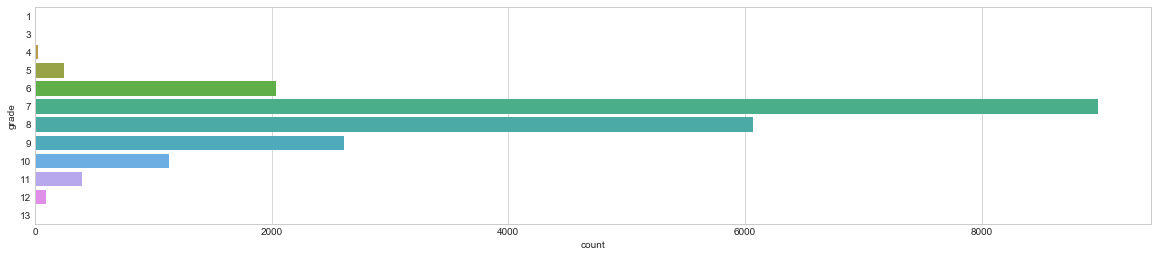

In [25]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="grade", data=df)

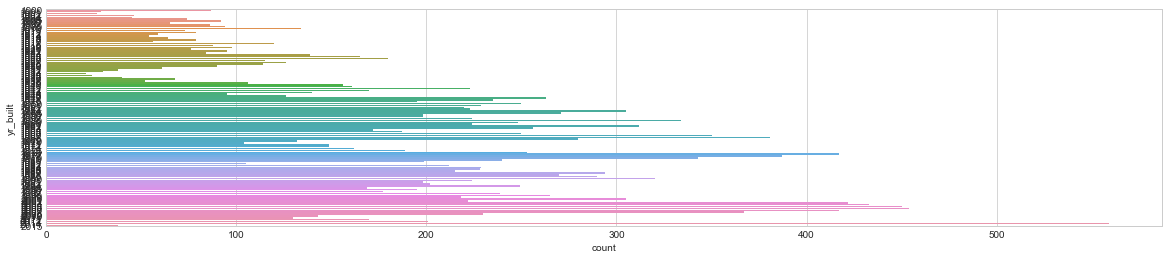

In [26]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,4)) 
sns.countplot(y="yr_built", data=df)

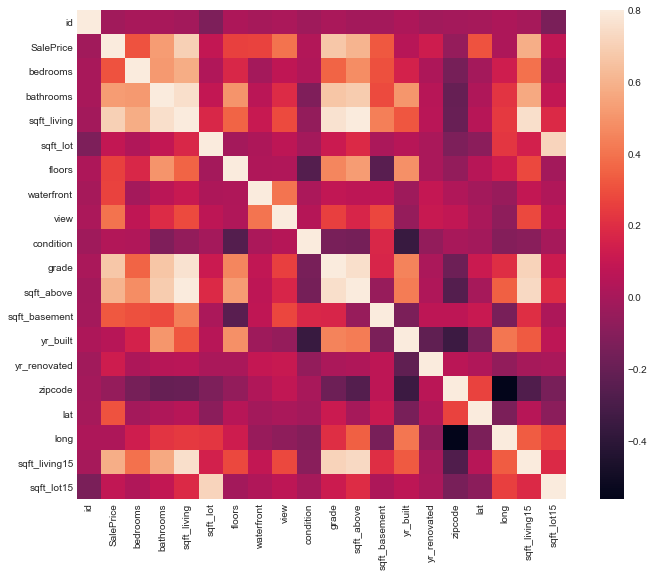

In [27]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

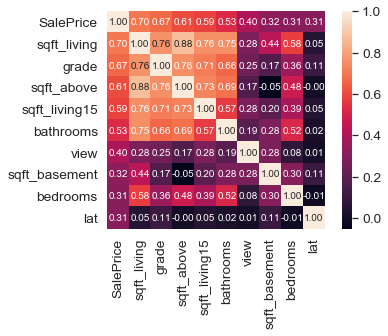

In [28]:
#saleprice corr
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [5]:
y = df['SalePrice']
X = df.drop(['SalePrice','date'], axis = 1)
names = list(X.columns.values)
names

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
#introducing missing values
for i in range((int)(X.size * 0.1)):
    row_index = np.random.randint(X.shape[0])
    col_index = np.random.randint(X.shape[1])
    col = X.columns[col_index]
    X.loc[row_index,col] = np.nan
# Check what percentage of the data is missing
val = 0
for col in X.columns:
    val += X[col].count()

print(val / X.size)

0.9048331048321308


In [7]:
X.isnull().sum()

id               1940
bedrooms         2098
bathrooms        2017
sqft_living      2072
sqft_lot         2010
floors           1971
waterfront       2146
view             2054
condition        1993
grade            2057
sqft_above       2083
sqft_basement    2064
yr_built         2125
yr_renovated     2052
zipcode          2096
lat              2077
long             2061
sqft_living15    2102
sqft_lot15       2062
dtype: int64

In [45]:
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,3.0,NaN,1180.0,5650.0,1.0,NaN,NaN,3.0,7.0,1180.0,0.0,NaN,0.0,98178.0,NaN,-122.257,1340.0,NaN
1,6.414100e+09,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5.631500e+09,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2.487201e+09,4.0,NaN,1960.0,5000.0,1.0,0.0,0.0,5.0,NaN,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1.954401e+09,3.0,2.00,1680.0,NaN,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [8]:
#Imputing the missing values with median
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.129301e+09,3.000000,1.00,1180.0,5650.000000,1.492058,0.000000,0.0,3.0,7.0,1180.0,0.000000,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.000000
1,6.414100e+09,3.000000,2.25,2570.0,7242.000000,2.000000,0.007449,0.0,3.0,7.0,2170.0,400.000000,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.000000
2,4.578891e+09,3.369408,1.00,770.0,10000.000000,1.000000,0.000000,0.0,3.0,6.0,770.0,0.000000,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.000000
3,2.487201e+09,4.000000,3.00,1960.0,15133.180483,1.000000,0.000000,0.0,5.0,7.0,1050.0,289.737378,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.000000
4,1.954401e+09,3.000000,2.00,1680.0,8080.000000,1.000000,0.000000,0.0,3.0,8.0,1680.0,0.000000,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,12672.168073


In [9]:
total = X.isnull().sum().sort_values(ascending=False)
percent = (X.isnull().sum()/X.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sqft_lot15,0,0.0
condition,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0
grade,0,0.0


## Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings
filterwarnings('ignore')

# Bagging

### Decision Tree Regressor

In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

mf = [2, 5, 10]
n = [100, 200, 300, 500]
ms = [0.1, 0.5, 1]

param_grid = dict(max_features = mf, n_estimators = n, max_samples = ms)

dt_rgr = DecisionTreeRegressor(max_depth = 5, random_state=0)
bag_rgr = GridSearchCV(BaggingRegressor(dt_rgr,  bootstrap=True, oob_score=True, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
print("Best Hyper Parameters:",bag_rgr.best_params_)

Best Hyper Parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 200}


In [56]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.7491
Test score: 0.7212


### Linear Regressor

In [57]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

bag_rgr = GridSearchCV(BaggingRegressor(lreg,  bootstrap=True, oob_score=True, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
bag_rgr.best_params_
print("Best Hyper Parameters:",bag_rgr.best_params_)

Best Hyper Parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 200}


In [58]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.6482
Test score: 0.6280


# Pasting

### Decision Tree Regression

In [59]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

mf = [2, 5, 10]
n = [100, 200, 300, 500]
ms = [0.1, 0.5, 1]

param_grid = dict(max_features = mf, n_estimators = n, max_samples = ms)

dt_rgr = DecisionTreeRegressor(max_depth = 5, random_state=0)
bag_rgr = GridSearchCV(BaggingRegressor(dt_rgr,  bootstrap=False, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
print("Best Hyper Parameters:",bag_rgr.best_params_)

Best Hyper Parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 200}


In [62]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.7551
Test score: 0.7232


### Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

bag_rgr = GridSearchCV(BaggingRegressor(lreg,  bootstrap=False, random_state=0), param_grid, cv = 5, iid = False)

bag_rgr.fit(X_train, y_train)
y_pred = bag_rgr.predict(X_test)
print("Best Hyper Parameters:",bag_rgr.best_params_)

Best Hyper Parameters: {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 200}


In [64]:
print('Train score: {:.4f}'.format(bag_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_rgr.score(X_test, y_test)))

Train score: 0.6491
Test score: 0.6287


# Adaboost Boosting

### Decision Tree Regressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor


n = [100, 200, 300, 500]
lr = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n, learning_rate = lr)

dt_rgr = DecisionTreeRegressor(max_depth = 5, random_state=0)
ada_rgr = GridSearchCV(AdaBoostRegressor(dt_rgr, random_state=0), param_grid, cv = 5, iid = False)
ada_rgr.fit(X_train, y_train)
y_pred = ada_rgr.predict(X_test)
print("Best Hyper Parameters:",ada_rgr.best_params_)

Best Hyper Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [66]:
print('Train score: {:.4f}'.format(ada_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_rgr.score(X_test, y_test)))

Train score: 0.8016
Test score: 0.7597


## Linear regression

In [67]:
n = [100, 200, 300, 500]
lr = [0.1, 0.5, 1]

param_grid = dict(n_estimators = n, learning_rate = lr)

ada_rgr = GridSearchCV(AdaBoostRegressor(lreg, random_state=0),  param_grid, cv = 5, iid = False)
ada_rgr.fit(X_train, y_train)
y_pred = ada_rgr.predict(X_test)
print("Best Hyper Parameters:",ada_rgr.best_params_)

Best Hyper Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [68]:
print('Train score: {:.4f}'.format(ada_rgr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_rgr.score(X_test, y_test)))

Train score: 0.4398
Test score: 0.4299


# Gradient Boosting

In [69]:
from  sklearn.ensemble import GradientBoostingRegressor

mf = [2, 5, 10]
n = [50, 100, 200]
md = [1, 5, 10]

param_grid = dict(max_features = mf, n_estimators = n, max_depth = md)

gbrt = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv = 5, iid = False)

gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
print("Best Hyper Parameters:",gbrt.best_params_)

Best Hyper Parameters: {'max_depth': 5, 'max_features': 5, 'n_estimators': 200}


In [70]:
print('Train score: {:.4f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.9404
Test score: 0.8654


# Principal Component Analysis

In [71]:
#reducing dimensions using PCA to create new dataset
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

pca.n_components_

11

## Linear Regression without PCA

In [79]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.674242240793372
0.6557793731457227


## Linear Regression with PCA

In [80]:
lreg.fit(X_train_reduced, y_train)
print(lreg.score(X_train_reduced, y_train))
print(lreg.score(X_test_reduced, y_test))

0.6443319181355665
0.6155325953853179


##### PCA reduced test and train scores for linear regression

## Polynomial Regression without PCA

In [75]:
from  sklearn.preprocessing  import PolynomialFeatures

train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [76]:
print(train_score_list)
print(test_score_list)

[0.674242240793372, 0.7966594924663959]
[0.6557793731457247, 0.7747840096656062]


## Polynomial Regression without PCA

In [77]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [78]:
print(train_score_list)
print(test_score_list)

[0.6443319181355665, 0.7553138111248706]
[0.6155325953853179, 0.7193217271924304]


#### Implementing PCA reduced the testing and training scores for Polynomial regression

# Ridge without PCA

In [83]:
from  sklearn.linear_model import Ridge

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

ridge_reg = GridSearchCV(Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1, cv = 5, iid = False)
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

print("Best Hyper Parameters:",ridge_reg.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters: {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    2.5s finished


In [84]:
print('Train score: {:.4f}'.format(ridge_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge_reg.score(X_test, y_test)))

Train score: 0.6742
Test score: 0.6552


Text(0.5, 0, '$\\alpha$')

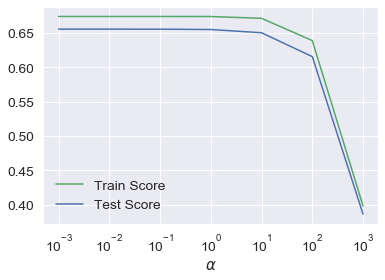

In [85]:
#variation of scores with alpha
train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

# Ridge with PCA

In [87]:
ridge_reg.fit(X_train_reduced,y_train)

y_pred = ridge_reg.predict(X_test_reduced)

print("Best Hyper Parameters:",ridge_reg.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters: {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.2s finished


In [88]:
print('Train score: {:.4f}'.format(ridge_reg.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(ridge_reg.score(X_test_reduced, y_test)))

Train score: 0.6443
Test score: 0.6156


Text(0.5, 0, '$\\alpha$')

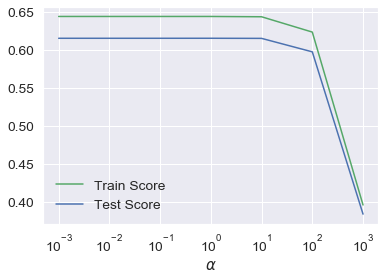

In [89]:
#variation scores with alpha
train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### With PCA the best parameters for ridge varied and also the scores got reduced.

# Lasso without PCA

In [90]:
from  sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train,y_train)

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

lasso_reg = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1, cv = 5, iid = False)
lasso_reg.fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)
print("Best Hyper Parameters:",lasso_reg.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters: {'alpha': 1}


[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.5s finished


In [91]:
print('Train score: {:.4f}'.format(lasso_reg.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso_reg.score(X_test, y_test)))

Train score: 0.6742
Test score: 0.6558


Text(0.5, 0, '$\\alpha$')

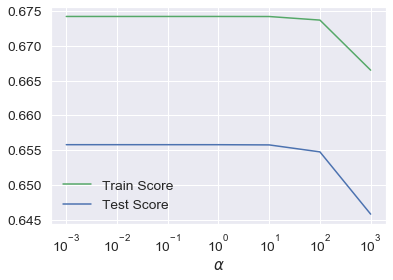

In [92]:
train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

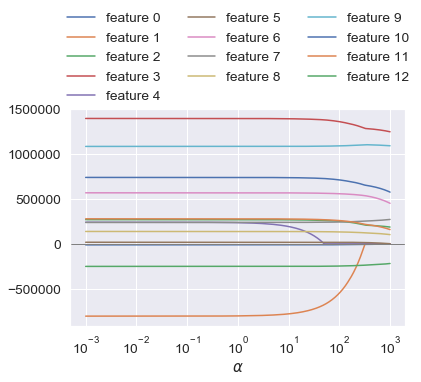

In [96]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,13):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

# Lasso with PCA

In [98]:
lasso_reg.fit(X_train_reduced, y_train)

y_pred = lasso_reg.predict(X_test_reduced)

print("Best Hyper Parameters:",lasso_reg.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters: {'alpha': 100}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.9s finished


In [99]:
print('Train score: {:.4f}'.format(lasso_reg.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(lasso_reg.score(X_test_reduced, y_test)))

Train score: 0.6443
Test score: 0.6155


Text(0.5, 0, '$\\alpha$')

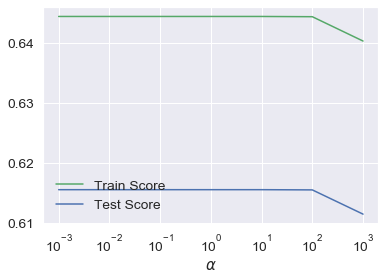

In [100]:
train_score_list = []
test_score_list = []

x_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### PCA reduced the scores and changed best parameters for Lasso

# KNN Regressor without PCA

In [101]:
from sklearn.neighbors import KNeighborsRegressor

n = [3,5,11,19]

param_grid = dict(n_neighbors=n)

knn=GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, iid = False)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print("Best Hyper Parameters:",knn.best_params_)

Best Hyper Parameters: {'n_neighbors': 5}


In [102]:
print('Train score: {:.4f}'.format(knn.score(X_train,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8062
Test score: 0.7035


# KNN Regressor with PCA


In [103]:
knn.fit(X_train_reduced,y_train)

y_pred = knn.predict(X_test_reduced)

print("Best Hyper Parameters:",knn.best_params_)

Best Hyper Parameters: {'n_neighbors': 5}


In [104]:
print('Train score: {:.4f}'.format(knn.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

Train score: 0.7990
Test score: 0.6942


#### KNN regressor being the best performing model, gave reduced scores after implementing PCA

# SVM Regressor without PCA

In [105]:
from sklearn.svm import SVR

C = [0.001, 0.01, 0.1, 1, 10, 100]
kernel = ['linear','poly','rbf']

param_grid = dict(C=C, kernel=kernel)

SVM=GridSearchCV(SVR(gamma ='scale'), param_grid, cv = 5, iid = False)

SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

print("Best Hyper Parameters:",SVM.best_params_)

Best Hyper Parameters: {'C': 100, 'kernel': 'poly'}


In [106]:
print('Train score: {:.4f}'.format(SVM.score(X_train,y_train)))
print('Test score: {:.4f}'.format(SVM.score(X_test, y_test)))

Train score: 0.5228
Test score: 0.5079


# SVM Regressor with PCA

In [108]:
SVM.fit(X_train_reduced,y_train)

y_pred = SVM.predict(X_test_reduced)

print("Best Hyper Parameters:",SVM.best_params_)

Best Hyper Parameters: {'C': 100, 'kernel': 'poly'}


In [109]:
print('Train score: {:.4f}'.format(SVM.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(SVM.score(X_test_reduced, y_test)))

Train score: 0.2483
Test score: 0.2184


#### The best parameters of SVM seems unchanged on implementing PCA but the scores have dropped way down.

# Linear SVR without PCA

In [110]:
from sklearn.svm import SVR, LinearSVR

C = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(C=C)

linearsvr=GridSearchCV(SVR(), param_grid, cv = 5, iid = False)

linearsvr.fit(X_train,y_train)
y_pred = linearsvr.predict(X_test)

print("Best Hyper Parameters:",linearsvr.best_params_)

Best Hyper Parameters: {'C': 100}


In [111]:
print('Train score: {:.4f}'.format(linearsvr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(linearsvr.score(X_test, y_test)))

Train score: 0.0514
Test score: 0.0614


# Linear SVR with PCA

In [113]:
linearsvr.fit(X_train_reduced,y_train)
y_pred = linearsvr.predict(X_test_reduced)

print("Best Hyper Parameters:",linearsvr.best_params_)

Best Hyper Parameters: {'C': 100}


In [114]:
print('Train score: {:.4f}'.format(linearsvr.score(X_train_reduced,y_train)))
print('Test score: {:.4f}'.format(linearsvr.score(X_test_reduced, y_test)))

Train score: 0.0485
Test score: 0.0596


#### GridsearchCV gave similar hyper parameters for Linear SVR after implementing PCA. The scores went down on PCA implementation

# Neural Networks

In [12]:
import keras as k
import pandas as pd

In [13]:
X_NN_train = X_train[:,0:20]
X_NN_test = X_test[:,0:20]

In [14]:
X_NN_train.shape

(16209, 19)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# create model
model = Sequential()
model.add(Dense(19, input_dim=19, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [22]:
# Compile model
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [25]:
# Fit Model
model.fit(X_NN_train, y_train, epochs = 100, batch_size = 5)

Epoch 1/100
3242/3242 [==============================] - 2s 654us/step - loss: 256175178971158151168.0000 - mse: 256175178971158151168.0000
Epoch 2/100
3242/3242 [==============================] - 2s 642us/step - loss: 135696056320.0000 - mse: 135696056320.0000
Epoch 3/100
3242/3242 [==============================] - 2s 691us/step - loss: 135726055424.0000 - mse: 135726055424.0000
Epoch 4/100
3242/3242 [==============================] - 2s 709us/step - loss: 135768875008.0000 - mse: 135768875008.0000
Epoch 5/100
3242/3242 [==============================] - 2s 698us/step - loss: 135638474752.0000 - mse: 135638491136.0000
Epoch 6/100
3242/3242 [==============================] - 2s 679us/step - loss: 135715676160.0000 - mse: 135715676160.0000
Epoch 7/100
3242/3242 [==============================] - 2s 645us/step - loss: 135631953920.0000 - mse: 135631937536.0000
Epoch 8/100
3242/3242 [==============================] - 2s 652us/step - loss: 135702691840.0000 - mse: 135702691840.0000
Epoch 

3242/3242 [==============================] - 2s 613us/step - loss: 135638777856.0000 - mse: 135638777856.0000
Epoch 66/100
3242/3242 [==============================] - 2s 604us/step - loss: 135570685952.0000 - mse: 135570677760.0000
Epoch 67/100
3242/3242 [==============================] - 2s 616us/step - loss: 135721345024.0000 - mse: 135721345024.0000
Epoch 68/100
3242/3242 [==============================] - 2s 611us/step - loss: 135715528704.0000 - mse: 135715528704.0000
Epoch 69/100
3242/3242 [==============================] - 2s 609us/step - loss: 135697629184.0000 - mse: 135697629184.0000
Epoch 70/100
3242/3242 [==============================] - 2s 609us/step - loss: 135728136192.0000 - mse: 135728136192.0000
Epoch 71/100
3242/3242 [==============================] - 2s 610us/step - loss: 135701274624.0000 - mse: 135701274624.0000
Epoch 72/100
3242/3242 [==============================] - 2s 618us/step - loss: 135567491072.0000 - mse: 135567491072.0000
Epoch 73/100
3242/3242 [=====

In [24]:
model.evaluate(X_NN_test, y_test)

169/169 [==============================] - 0s 674us/step - loss: 419171368960.0000 - mse: 419171368960.0000


[419171368960.0, 419171368960.0]

In [26]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_NN_train)
y_test_predict = model.predict(X_NN_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: -0.00
Test score: -0.00
